<hr>
<p style="text-align: center;">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3KhGzNLk1MLxTIIwrj_9n4GZnekdkDWR8bw&s" width="105"/>
</p>

<p style="text-align: center;">
  <strong>Colegio Universitario de Cartago</strong><br>
  II Cuatrimestre 2025<br>
  <strong>BIG DATA</strong><br>
  Programación II<br>
  BD-143<br><br>

  <strong style="font-size: 18px;">Proyecto Final</strong><br>
  <strong>Predicción del Consumo de Energía en Costa Rica</strong><br><br>

  Nombre Docente: Osvaldo Gonzalez<br>
  Nombre Estudiante: Fabián Brenes Loría<br>
  Carné: 303650023<br>
  Fecha: 20-8-2025
</p>
<hr>

- **Importación de librerias necesarias para ejecución del main.py**

In [2]:
"""IMPORTACION DE LIBRERIAS"""

from src.helpers.verificacionLibrerias import libreriasinstaladas

# Uso de la clase libreriasinstaladas
verificar_librerias = libreriasinstaladas(['importlib.util','subprocess','sys','pandas','matplotlib','seaborn','sqlalchemy','pyodbc',
                                           'urllib'])
verificar_librerias.instalar_librerias()

from src.datos.datos import unionArchivos
from src.eda.exploracion_archivos import EDA_Datos
from src.basedatos.conexion_basedatos import conexion_basedatos

importlib.util ya está instalado.
subprocess ya está instalado.
sys ya está instalado.
pandas ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.
sqlalchemy ya está instalado.
pyodbc ya está instalado.
urllib ya está instalado.


- **Llamado a las clases para creación del data frame a utilizar**

In [3]:
#Variables para usar clase unionArchivos
ruta = "C:/Users/fab_t/OneDrive/CUC/PrograII/Proyecto5_Predicción_delConsumode_EnergíaenCostaRica/data/raw"
columnas_eliminar = ["Expediente", "Resolución", "Fecha de Publicación", "Pliego"]

# Uso de la clase unionArchivos
obj_union_archivos = unionArchivos(ruta, columnas_eliminar)
df_unido = obj_union_archivos.union()
# print(df_unido) # Código solo para pruebas de ejecución (por eso se comenta)

# Uso de la clase exploración_archivos

obj_eda = EDA_Datos(df_unido)


 DataFrame final listo con 4186 filas y 8 columnas.


- **Limpieza de datos**

In [4]:
"""LIMPIEZA DE DATOS"""
obj_eda.valores_nulos()
cols = ['Mes', 'Empresa', 'Tipo Tarifa', 'Descripción Tarifa', 'Bloque']
obj_eda.eliminar_espacios(cols)

""" EJECUTAR ANÁLISIS EDA """
obj_eda.resumen_general()
print("Diccionario de cardinalidades: \n",obj_eda.cardinalidades(cols),"\n") #diccionario de cardinalidades
obj_eda.zscore_outliers()
print("Top 5 de tarifas por Descripción Tarifa",obj_eda.top_tarifas_por('Descripción Tarifa'),"\n")


 Valores nulos por columna:
Mes Cód.              0
Mes                   0
Año                   0
Empresa               0
Tipo Tarifa           0
Descripción Tarifa    0
Bloque                0
Tarifa                0
dtype: int64 


 Primeras 10 filas:
   Mes Cód.        Mes   Año Empresa Tipo Tarifa Descripción Tarifa  \
0        12  Diciembre  2015   JASEC        T-CS       Preferencial   
1        12  Diciembre  2015   JASEC        T-CS       Preferencial   
2        12  Diciembre  2015   JASEC        T-CS       Preferencial   
3        12  Diciembre  2015   JASEC        T-CS       Preferencial   
4        12  Diciembre  2015   JASEC        T-CS       Preferencial   
5        12  Diciembre  2015   JASEC        T-GE            General   
6        12  Diciembre  2015   JASEC        T-GE            General   
7        12  Diciembre  2015   JASEC        T-GE            General   
8        12  Diciembre  2015   JASEC        T-GE            General   
9        12  Diciembre  2015   JA

- **Visualización de los datos EDA**

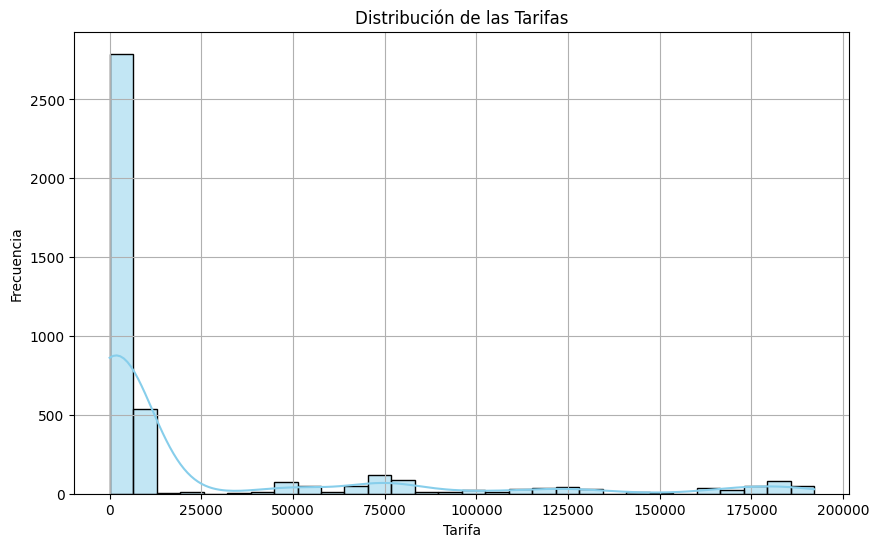

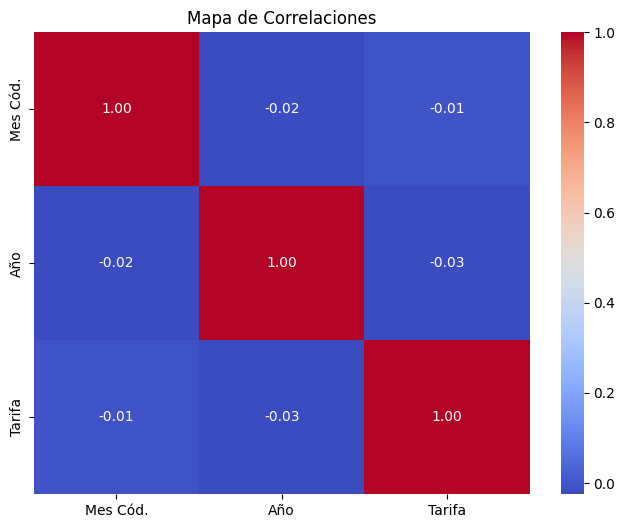

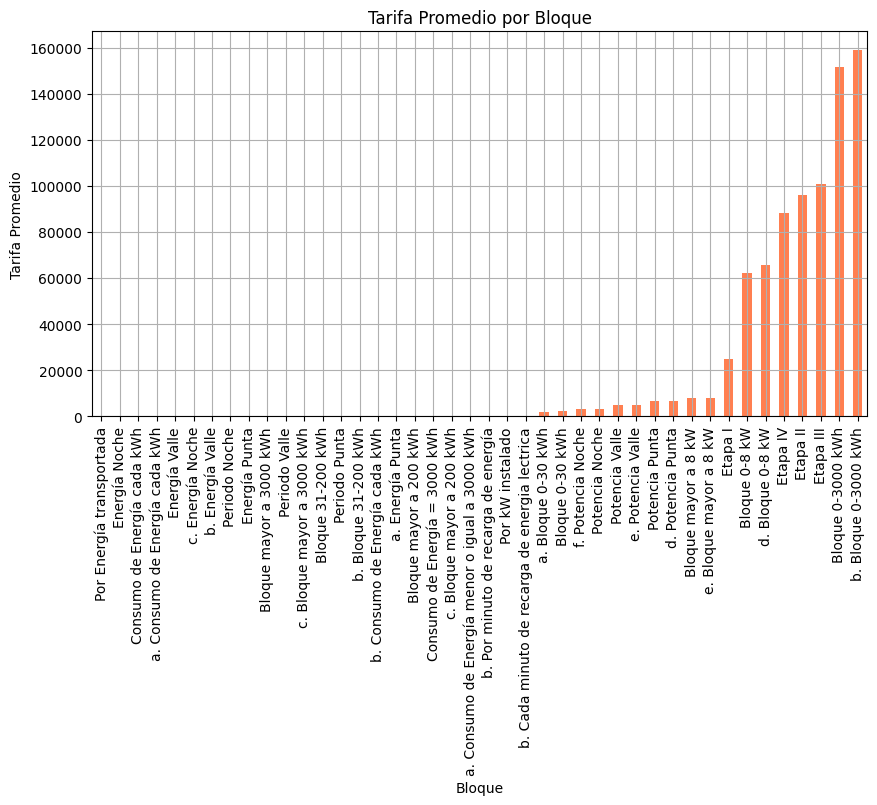

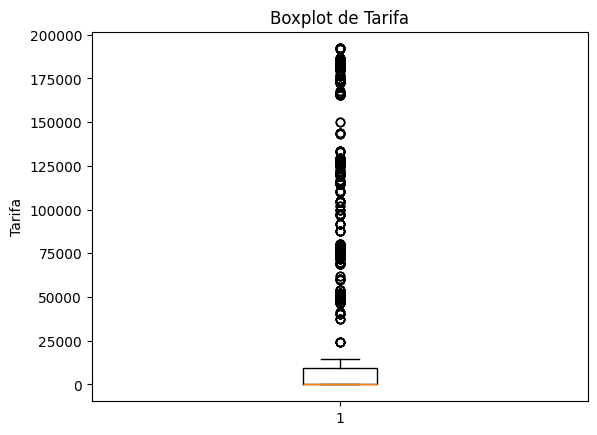

In [5]:
"""VISUALIZACIÓN DE DATOS EDA"""
obj_eda.distribucion_tarifas() #gráfico de barras
obj_eda.correlaciones_numericas() #gráfico de calor
obj_eda.tarifas_por_bloque() # gráfico de barras
obj_eda.plot_box_tarifa() #gráfico de boxplot

### Conexión a la base de datos

Se realiza la comprobación de exitencia de la tabla y llenado de la misma

In [8]:
"""  CONEXIÓN A LA BASE DE DATOS Y CARGA DE DATOS"""

# Parámetros de conexión a la base de datos SQL Server
driver = 'ODBC Driver 17 for SQL Server'
server = 'AZUSFA\\FA_LOCALSERVER'
database = 'Consumo_Energia_JASEC'
username = 'RemoteUser'
password = 'Intento900@'

obj_connect_bd = conexion_basedatos(driver, server, database, username, password)
obj_connect_bd.conectar()

nombre_tabla = "Datos_JASEC"

# Verificacion de existeencia, creación y llenado de tabla en SQL Server
obj_connect_bd.insertar_dataframe(obj_eda.df, nombre_tabla) # ### COMENTARLO PARA EVITAR DUPLICAR DATOS EN LA TABLA

Conexión establecida con la base de datos.
Tabla 'Datos_JASEC' creada exitosamente.

Datos insertados en la tabla 'Datos_JASEC'.
